In [1]:
%load_ext autoreload
%autoreload 2

In [40]:
import numpy as np
import random 
import matplotlib.pyplot as plt

In [3]:
from rmab.simulator import RMABSimulator, random_valid_transition, random_valid_transition_round_down, synthetic_transition_small_window
from rmab.uc_whittle import UCWhittle
from rmab.ucw_value import UCWhittle_value
from rmab.baselines import optimal_policy, random_policy, WIQL
from rmab.fr_dynamics import get_all_transitions


In [8]:
n_arms      = 8
budget      = 3
n_states    = 2
n_actions   = 2

# solution/evaluation setup
discount    = 0.9
alpha       = 3 #7 - too pessimistic #0.1 - too optimistic

# experiment setup
seed        = 42
VERBOSE     = False
LOCAL       = False 
prefix      = ''
n_episodes  = 30
episode_len = 20
n_epochs    = 10
data        = 'synthetic'

In [9]:
np.random.seed(seed)
random.seed(seed)

In [19]:
all_population_size = 101 # number of random arms to generate
all_transitions = get_all_transitions(all_population_size)

In [20]:
all_transitions.shape

(100, 2, 2, 2)

In [21]:
all_features = np.arange(all_population_size-1)

In [22]:
simulator = RMABSimulator(all_population_size, all_features, all_transitions,
            n_arms, episode_len, n_epochs, n_episodes, budget, number_states=n_states)

acting should always be good! 0.000 < 0.044
acting should always be good! 0.000 < 0.162
acting should always be good! 0.108 < 0.183
good start state should always be good! 0.380 < 0.508
good start state should always be good! 0.506 < 0.760
cohort [43 71 17 26 28 91 76 86]
cohort [63 11 44 45 76 96 79 39]
cohort [90 53 13 62  7 88 73 72]
cohort [82 41 57 68 87 48 71 99]
cohort [70 31 58 76 25 69 27  7]
cohort [43  4 10  7 13 57 68  6]
cohort [65 15 75 91 62 98 25 54]
cohort [38  2 25 52 41 94 91 32]
cohort [42 92 30 60 41 37 73 23]
cohort [93  2 33 61 46 32 90 27]


In [23]:
random_rewards = random_policy(simulator, n_episodes, n_epochs)

first state [0 1 1 0 1 0 0 1]
instance 0, ep 1, state [0 0 0 1 1 1 1 0]
instance 0, ep 2, state [1 0 0 1 1 0 1 1]
instance 0, ep 3, state [1 1 0 1 0 0 0 0]
instance 0, ep 4, state [1 0 0 0 1 0 0 1]
instance 0, ep 5, state [1 1 1 0 0 1 1 0]
instance 0, ep 6, state [0 1 1 0 0 1 0 0]
instance 0, ep 7, state [0 0 1 1 0 0 1 0]
instance 0, ep 8, state [1 0 0 1 1 1 0 0]
instance 0, ep 9, state [0 0 1 0 0 1 0 1]
instance 0, ep 10, state [1 0 0 1 1 1 0 0]
instance 0, ep 11, state [1 0 0 1 1 1 0 0]
instance 0, ep 12, state [1 1 1 1 0 1 0 1]
instance 0, ep 13, state [1 1 0 1 1 1 1 0]
instance 0, ep 14, state [0 1 1 1 0 0 0 1]
instance 0, ep 15, state [1 0 0 0 1 0 0 1]
instance 0, ep 16, state [1 0 1 0 0 0 1 0]
instance 0, ep 17, state [0 0 1 0 1 0 1 1]
instance 0, ep 18, state [1 1 1 0 0 0 0 1]
instance 0, ep 19, state [0 0 1 0 0 0 1 1]
instance 0, ep 20, state [0 1 1 0 0 1 0 1]
instance 0, ep 21, state [1 0 1 1 0 1 0 1]
instance 0, ep 22, state [0 1 1 1 0 0 1 1]
instance 0, ep 23, state [1 0 0 1

In [24]:
optimal_reward = optimal_policy(simulator, n_episodes, n_epochs, discount)

first state [0 1 1 0 1 0 0 1]
   state [0 1 1 0 1 0 0 1] state_WI [  0.45   0.32   0.38   0.48 -10.     1.     0.88 -10.  ] sorted [5 6 3]
   state [0 0 1 0 0 0 1 1] state_WI [  0.45   0.61   0.38   0.48   0.67   1.   -10.   -10.  ] sorted [5 4 1]
   state [0 0 0 0 1 1 0 0] state_WI [  0.45   0.61   0.37   0.48 -10.   -10.     0.88   0.84] sorted [6 7 1]
   state [1 1 0 0 0 1 1 1] state_WI [  0.45   0.32   0.37   0.48   0.67 -10.   -10.   -10.  ] sorted [4 3 0]
   state [1 0 0 1 0 0 0 0] state_WI [0.45 0.61 0.37 0.3  0.67 1.   0.88 0.84] sorted [5 6 7]
   state [1 0 1 0 0 1 0 0] state_WI [  0.45   0.61   0.38   0.48   0.67 -10.     0.88   0.84] sorted [6 7 4]
   state [0 0 0 0 1 1 1 0] state_WI [  0.45   0.61   0.37   0.48 -10.   -10.   -10.     0.84] sorted [7 1 3]
   state [0 1 0 0 0 1 0 1] state_WI [  0.45   0.32   0.37   0.48   0.67 -10.     0.88 -10.  ] sorted [6 4 3]
   state [0 1 0 0 0 1 1 0] state_WI [  0.45   0.32   0.37   0.48   0.67 -10.   -10.     0.84] sorted [7 4 3]
   st

In [29]:
wiql_rewards = WIQL(simulator, n_episodes, n_epochs)

first state [0 1 1 0 1 0 0 1]
instance 0, ep 1, state [0 0 0 1 1 1 1 0]
instance 0, ep 2, state [1 0 0 1 1 0 1 1]
instance 0, ep 3, state [1 1 0 1 0 0 0 0]
instance 0, ep 4, state [1 0 0 0 1 0 0 1]
instance 0, ep 5, state [1 1 1 0 0 1 1 0]
instance 0, ep 6, state [0 1 1 0 0 1 0 0]
instance 0, ep 7, state [0 0 1 1 0 0 1 0]
instance 0, ep 8, state [1 0 0 1 1 1 0 0]
instance 0, ep 9, state [0 0 1 0 0 1 0 1]
instance 0, ep 10, state [1 0 0 1 1 1 0 0]
instance 0, ep 11, state [1 0 0 1 1 1 0 0]
instance 0, ep 12, state [1 1 1 1 0 1 0 1]
instance 0, ep 13, state [1 1 0 1 1 1 1 0]
instance 0, ep 14, state [0 1 1 1 0 0 0 1]
instance 0, ep 15, state [1 0 0 0 1 0 0 1]
instance 0, ep 16, state [1 0 1 0 0 0 1 0]
instance 0, ep 17, state [0 0 1 0 1 0 1 1]
instance 0, ep 18, state [1 1 1 0 0 0 0 1]
instance 0, ep 19, state [0 0 1 0 0 0 1 1]
instance 0, ep 20, state [0 1 1 0 0 1 0 1]
instance 0, ep 21, state [1 0 1 1 0 1 0 1]
instance 0, ep 22, state [0 1 1 1 0 0 1 1]
instance 0, ep 23, state [1 0 0 1

In [31]:
ucw_extreme_rewards = UCWhittle(simulator, n_episodes, n_epochs, discount, alpha=alpha, method='extreme')

solving UCWhittle using method: extreme
first state [0 1 1 0 1 0 0 1]
instance 0, ep 1, state [0 0 0 1 1 1 1 0]
instance 0, ep 2, state [1 0 0 1 1 0 1 1]
instance 0, ep 3, state [1 1 0 1 0 0 0 0]
instance 0, ep 4, state [1 0 0 0 1 0 0 1]
instance 0, ep 5, state [1 1 1 0 0 1 1 0]
---------------------------------------------------
0 100  | a  [0 0 0 1 1 0 0 1]  | s'  [0 0 1 1 1 1 0 0]  | r  4    | WI  [0.899 0.899 0.899 0.9   0.9   0.899 0.899 0.899]
instance 0, ep 6, state [0 1 1 0 0 1 0 0]
instance 0, ep 7, state [0 0 1 1 0 0 1 0]
instance 0, ep 8, state [1 0 0 1 1 1 0 0]
instance 0, ep 9, state [0 0 1 0 0 1 0 1]
instance 0, ep 10, state [1 0 0 1 1 1 0 0]
---------------------------------------------------
0 200  | a  [0 1 0 0 0 1 1 0]  | s'  [0 0 0 0 0 0 1 0]  | r  1    | WI  [  0.899   0.9     0.899   0.899   0.899   0.9     0.9   -10.   ]
instance 0, ep 11, state [1 0 0 1 1 1 0 0]
instance 0, ep 12, state [1 1 1 1 0 1 0 1]
instance 0, ep 13, state [1 1 0 1 1 1 1 0]
instance 0, ep 1

In [33]:
ucw_ucb_rewards = UCWhittle(simulator, n_episodes, n_epochs, discount, alpha=alpha, method='UCB')

solving UCWhittle using method: UCB
first state [0 1 1 0 1 0 0 1]
instance 0, ep 1, state [0 0 0 1 1 1 1 0]
instance 0, ep 2, state [1 0 0 1 1 0 1 1]
instance 0, ep 3, state [1 1 0 1 0 0 0 0]
instance 0, ep 4, state [1 0 0 0 1 0 0 1]
instance 0, ep 5, state [1 1 1 0 0 1 1 0]
---------------------------------------------------
0 100  | a  [0 0 1 0 0 0 1 1]  | s'  [1 0 0 0 0 0 0 1]  | r  2    | WI  [-0.   -0.    0.02 -0.   -0.   -0.   -0.   -0.  ]
instance 0, ep 6, state [0 1 1 0 0 1 0 0]
instance 0, ep 7, state [0 0 1 1 0 0 1 0]
instance 0, ep 8, state [1 0 0 1 1 1 0 0]
instance 0, ep 9, state [0 0 1 0 0 1 0 1]
instance 0, ep 10, state [1 0 0 1 1 1 0 0]
---------------------------------------------------
0 200  | a  [0 1 1 1 0 0 0 0]  | s'  [0 1 1 0 0 0 0 1]  | r  3    | WI  [ 3.0e-03  7.2e-02  3.3e-02  1.2e-02 -1.0e+01 -0.0e+00 -0.0e+00 -0.0e+00]
instance 0, ep 11, state [1 0 0 1 1 1 0 0]
instance 0, ep 12, state [1 1 1 1 0 1 0 1]
instance 0, ep 13, state [1 1 0 1 1 1 1 0]
instance 0, 

In [36]:
{'random_rewards': np.mean(random_rewards), 
 'optimal_rewards': np.mean(optimal_reward), 
 'wiql_rewards': np.mean(wiql_rewards), 
 'extreme_rewards': np.mean(ucw_extreme_rewards), 
 'ucb_rewards': np.mean(ucw_ucb_rewards)}

{'random_rewards': 3.2284525790349416,
 'optimal_rewards': 3.6950083194675543,
 'wiql_rewards': 3.0993344425956737,
 'extreme_rewards': 2.991846921797005,
 'ucb_rewards': 3.0876871880199666}

In [43]:
{'random_rewards': np.std(random_rewards), 
 'optimal_rewards': np.std(optimal_reward), 
 'wiql_rewards': np.std(wiql_rewards), 
 'extreme_rewards': np.std(ucw_extreme_rewards), 
 'ucb_rewards': np.std(ucw_ucb_rewards)}

{'random_rewards': 1.3034789370240683,
 'optimal_rewards': 1.368406912848703,
 'wiql_rewards': 1.292477746457008,
 'extreme_rewards': 1.1754986550600255,
 'ucb_rewards': 1.3196826152440155}

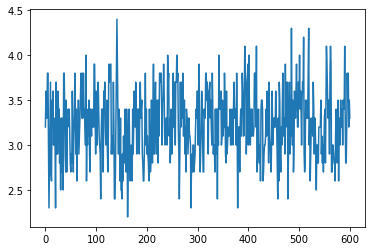

In [41]:
plt.plot(np.mean(random_rewards,axis=0))

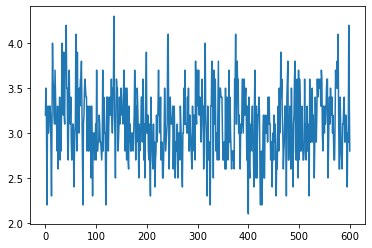

In [42]:
plt.plot(np.mean(wiql_rewards,axis=0))